<a href="https://colab.research.google.com/github/MSGanga/MSGanga/blob/main/Task6_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary Modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
# Building the Model
from sklearn.linear_model import LinearRegression

X = df['Ground Temperature']
y = df['Chirps/Second']
X=X.values.reshape(-1,1)
y=y.values
reg = LinearRegression().fit(X, y)
print("Regression Coefficient/Slope: ", reg.coef_[0])
print("Regression Constant/Intercept: ", reg.intercept_)
print(f"\nEquation of the best fit line: \nRate = {(reg.intercept_):.4f} + {(reg.coef_[0]):.4f} * Temperature")
r_sq = reg.score(X, y)
print('\nR^2 --> Coefficient of Determination:', round(r_sq,3))

Regression Coefficient/Slope:  0.20299973140771363
Regression Constant/Intercept:  0.45931464523595267

Equation of the best fit line: 
Rate = 0.4593 + 0.2030 * Temperature

R^2 --> Coefficient of Determination: 0.692


Since Coefficient of Determination is 0.692, the model is a `moderate fit` for this data.

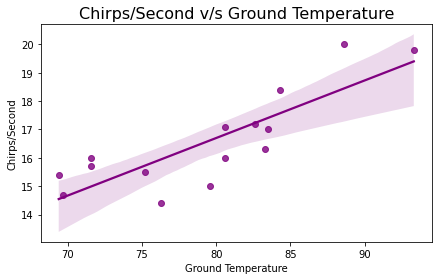

In [ ]:
# Regression plot using Seaborn's regplot() function.
plt.figure(figsize=(7,4))
plt.title("Chirps/Second v/s Ground Temperature",fontsize=16)
sns.regplot('Ground Temperature','Chirps/Second',data=df, color="purple")
plt.show()

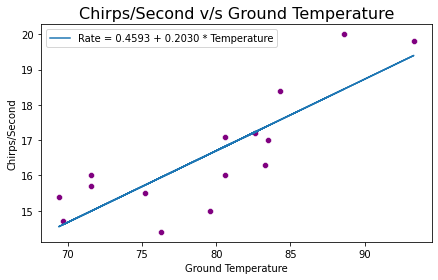

In [ ]:
#Chirps per Second v/s Ground Temperature
plt.figure(figsize=(7,4))
plt.title("Chirps/Second v/s Ground Temperature",fontsize=16)
sns.scatterplot('Ground Temperature','Chirps/Second',data=df, color="purple")
r = reg.intercept_ + reg.coef_[0] * X
plt.plot(X,r,label=f"Rate = {(reg.intercept_):.4f} + {(reg.coef_[0]):.4f} * Temperature")
plt.legend()
plt.show()

In [ ]:
#rate when ground temperature reaches 95
y_pred_rate = reg.intercept_ + reg.coef_ * 95 
print('Rate at which Crickets were chirping:', y_pred_rate[0])

Rate at which Crickets were chirping: 19.74428912896875


In [ ]:
rate=18 #rickets chirping at a rate of 18 chirps per second.
temp = (rate - reg.intercept_)/ reg.coef_[0]
print("Approximate Ground Temperature: ", temp)

Approximate Ground Temperature:  86.40743134548568


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
# Loading the dataset.
df = pd.read_fwf("/content/brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
# Checking for missing values
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
# Building the Model
X2 = df['Body']
y2 = df['Brain']
X2=X2.values.reshape(-1,1)
y2=y2.values
reg2 = LinearRegression().fit(X2, y2)
print("Regression Coefficient/Slope: ", reg2.coef_[0])
print("Regression Constant/Intercept: ", reg2.intercept_)
print(f"\nEquation of the best fit line: \nbrain weight = {(reg2.intercept_):.4f} + {(reg2.coef_[0]):.4f} * body weight")
r_sq2 = reg2.score(X2, y2)
print('\nR^2 --> Coefficient of Determination:', round(r_sq2,3))

Regression Coefficient/Slope:  0.9029129477287057
Regression Constant/Intercept:  -56.85554542859637

Equation of the best fit line: 
brain weight = -56.8555 + 0.9029 * body weight

R^2 --> Coefficient of Determination: 0.873


The equation is a `good fit` for this data as the Coefficient of Determination (r^2) is greater than 0.8 (as 0.8 and greater is considered a strong correlation).

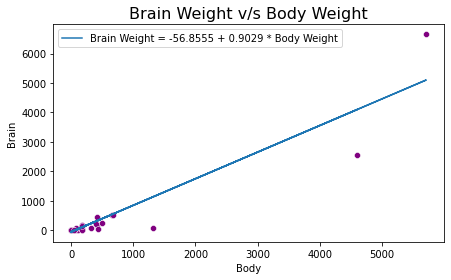

In [ ]:
# Brain Weight v/s Body Weight
plt.figure(figsize=(7,4))
plt.title("Brain Weight v/s Body Weight",fontsize=16)
sns.scatterplot('Body','Brain',data=df, color="purple")
b = reg2.intercept_ + reg2.coef_[0] * X2
plt.plot(X2,b,label=f"Brain Weight = {(reg2.intercept_):.4f} + {(reg2.coef_[0]):.4f} * Body Weight")
plt.legend()
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
# Loading the dataset
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
# Checking for missing values
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
# Checking the number of rows and columns in dataframe df.
df.shape

(52, 6)

In [ ]:
# Feature and Target variables.
X3 = df.drop("Salary", axis=1)
y3 = df['Salary']
y3=y3.values

# Build linear regression model 
reg3 = LinearRegression().fit(X3, y3)

# Print the value of the intercept 
print("Regression Constant/Intercept: ", reg3.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.
print("\nRegression Coefficients: ")
for item in list(zip(X3.columns.values, reg3.coef_)):
  print(f"{item[0]} : {item[1]}") 

Regression Constant/Intercept:  11410.14654725559

Regression Coefficients: 
Sex : 1241.792499601427
Rank : 5586.1814495214385
Year : 482.85976782882153
Degree : -1331.6440634059095
YSdeg : -128.79057354486122


In [ ]:
#Find the columns with the best R2 score
r = np.array([df[i].corr(df["Salary"]) for i in df.columns[:-1]])
r2 = r**2
col=list(df.columns[:-1])
df_r2 = pd.DataFrame({'feature':col,"r2_squared":r2})
df_r2.sort_values(by="r2_squared", ascending=False)

,feature,r2_squared
1,Rank,0.752536
2,Year,0.490937
4,YSdeg,0.455428
0,Sex,0.063899
3,Degree,0.004862


The more the r-square closer to one, the better. So, we can select `'Rank'`, `'Year'` and `'YSdeg'`. As the 	r2_squared value of 'Sex' column is low (0.063899), it is not an important feature in predicting the Salary 